In [2]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
%matplotlib inline
from scipy.ndimage import affine_transform, zoom
from scipy import misc

### Image import using PIL.Image

In [5]:
im = Image.open(r'E:\image_processing\flowers\daisy\5547758_eea9edfd54_n.jpg')
im.show()  # opens the image in new window and diaplay the same.

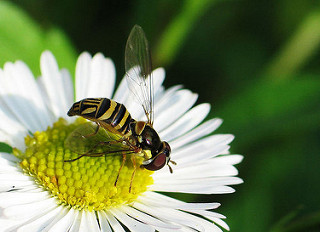

In [6]:
display(im)  # displaying in jupyter notebook

In [11]:
print(im.width, im.height)

320 232


In [12]:
print(im.mode)

RGB


In [13]:
print(im.format)

JPEG


In [14]:
print(im.format_description)

JPEG (ISO 10918)


In [15]:
print(type(im))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


## imageio to read image

In [16]:
import imageio

In [17]:
im2 = imageio.imread(r'E:\image_processing\flowers\daisy\5547758_eea9edfd54_n.jpg')

In [19]:
print(im2)
# its an array  (imageio.core.util.Array)

[[[ 97 131  55]
  [ 89 125  51]
  [ 84 122  49]
  ...
  [ 30  64  14]
  [ 32  66  15]
  [ 34  68  17]]

 [[108 150  68]
  [100 143  63]
  [ 95 139  60]
  ...
  [ 32  64  15]
  [ 33  65  15]
  [ 35  68  15]]

 [[112 161  72]
  [104 154  67]
  [ 99 149  64]
  ...
  [ 34  66  16]
  [ 34  67  14]
  [ 36  69  16]]

 ...

 [[250 250 250]
  [251 251 251]
  [252 252 252]
  ...
  [ 15  26  10]
  [ 14  25  11]
  [ 15  23  10]]

 [[248 248 248]
  [250 250 250]
  [250 250 250]
  ...
  [ 16  29  11]
  [ 15  28  11]
  [ 15  26  12]]

 [[251 251 251]
  [252 252 252]
  [249 249 249]
  ...
  [ 17  32  13]
  [ 18  31  13]
  [ 17  30  13]]]


In [20]:
im2.shape

(232, 320, 3)

In [21]:
im2.dtype

dtype('uint8')

In [22]:
print(type(im2))

<class 'imageio.core.util.Array'>


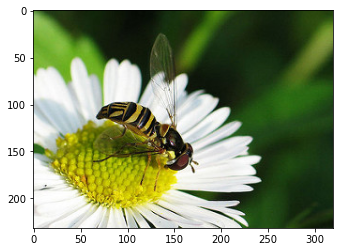

In [24]:
plt.imshow(im2)
plt.show()

In [25]:
len(im2)

# 232 is pixel (height)

232

## matplotlib to read image

In [26]:
im3 = mpimg.imread(r'E:\image_processing\flowers\daisy\5547758_eea9edfd54_n.jpg')

In [27]:
print(im3)

[[[ 97 131  55]
  [ 89 125  51]
  [ 84 122  49]
  ...
  [ 30  64  14]
  [ 32  66  15]
  [ 34  68  17]]

 [[108 150  68]
  [100 143  63]
  [ 95 139  60]
  ...
  [ 32  64  15]
  [ 33  65  15]
  [ 35  68  15]]

 [[112 161  72]
  [104 154  67]
  [ 99 149  64]
  ...
  [ 34  66  16]
  [ 34  67  14]
  [ 36  69  16]]

 ...

 [[250 250 250]
  [251 251 251]
  [252 252 252]
  ...
  [ 15  26  10]
  [ 14  25  11]
  [ 15  23  10]]

 [[248 248 248]
  [250 250 250]
  [250 250 250]
  ...
  [ 16  29  11]
  [ 15  28  11]
  [ 15  26  12]]

 [[251 251 251]
  [252 252 252]
  [249 249 249]
  ...
  [ 17  32  13]
  [ 18  31  13]
  [ 17  30  13]]]


In [28]:
print(type(im3))

# reading image as numpy ndarray

<class 'numpy.ndarray'>


In [29]:
im3.shape

(232, 320, 3)

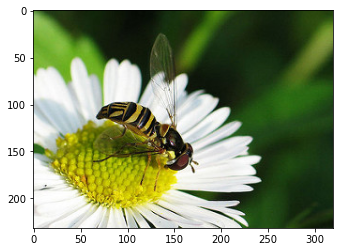

In [31]:
plt.imshow(im3)

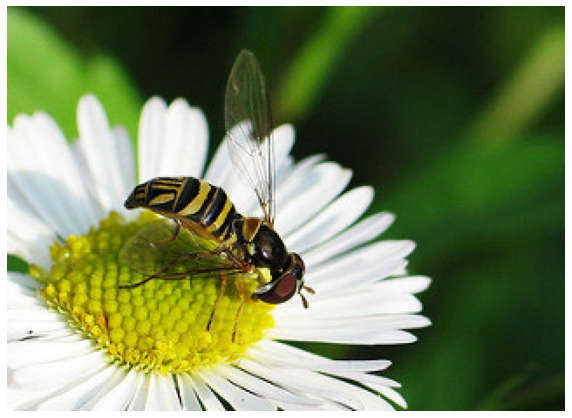

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(im3)
plt.axis('off')
plt.show()

### reading multiple images from a folder

In [39]:
!pip install opencv-python

In [40]:
import cv2
import glob

In [43]:
images = [cv2.imread(i) for i in glob.glob(r'E:\image_processing\test_img\*.jpg')]

In [44]:
print(images)

[array([[[ 55, 131,  97],
        [ 51, 125,  89],
        [ 49, 122,  84],
        ...,
        [ 14,  64,  30],
        [ 15,  66,  32],
        [ 17,  68,  34]],

       [[ 68, 150, 108],
        [ 63, 143, 100],
        [ 60, 139,  95],
        ...,
        [ 15,  64,  32],
        [ 15,  65,  33],
        [ 15,  68,  35]],

       [[ 72, 161, 112],
        [ 67, 154, 104],
        [ 64, 149,  99],
        ...,
        [ 16,  66,  34],
        [ 14,  67,  34],
        [ 16,  69,  36]],

       ...,

       [[250, 250, 250],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [ 10,  26,  15],
        [ 11,  25,  14],
        [ 10,  23,  15]],

       [[248, 248, 248],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [ 11,  29,  16],
        [ 11,  28,  15],
        [ 12,  26,  15]],

       [[251, 251, 251],
        [252, 252, 252],
        [249, 249, 249],
        ...,
        [ 13,  32,  17],
        [ 13,  31,  18],
        [ 13,  30,  17]

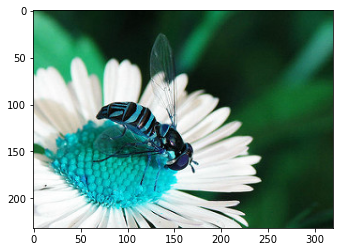

In [45]:
plt.imshow(images[0])

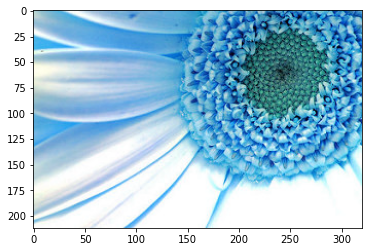

In [46]:
plt.imshow(images[1])

#### to access multiple format files

In [57]:
image_dir = 'E:\\image_processing\\test_img\\'
ext = ['jpg', 'png']
files = []
[files.extend(glob.glob(image_dir + '*.' + i)) for i in ext]

images2 = [cv2.imread(j) for j in files]

In [59]:
print(images2)

[array([[[ 55, 131,  97],
        [ 51, 125,  89],
        [ 49, 122,  84],
        ...,
        [ 14,  64,  30],
        [ 15,  66,  32],
        [ 17,  68,  34]],

       [[ 68, 150, 108],
        [ 63, 143, 100],
        [ 60, 139,  95],
        ...,
        [ 15,  64,  32],
        [ 15,  65,  33],
        [ 15,  68,  35]],

       [[ 72, 161, 112],
        [ 67, 154, 104],
        [ 64, 149,  99],
        ...,
        [ 16,  66,  34],
        [ 14,  67,  34],
        [ 16,  69,  36]],

       ...,

       [[250, 250, 250],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [ 10,  26,  15],
        [ 11,  25,  14],
        [ 10,  23,  15]],

       [[248, 248, 248],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [ 11,  29,  16],
        [ 11,  28,  15],
        [ 12,  26,  15]],

       [[251, 251, 251],
        [252, 252, 252],
        [249, 249, 249],
        ...,
        [ 13,  32,  17],
        [ 13,  31,  18],
        [ 13,  30,  17]

In [61]:
len(images2)

6

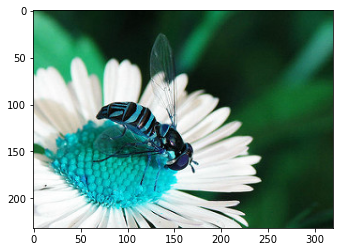

In [62]:
plt.imshow(images2[0])

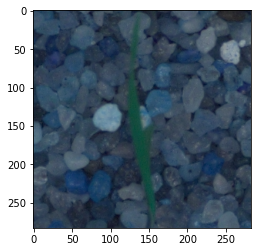

In [63]:
plt.imshow(images2[-1])

# Image convetions

In [65]:
im = Image.open(r'E:\image_processing\test_img\5547758_eea9edfd54_n.jpg') # reading image with PIL module

In [66]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x232 at 0x1E506C602B0>


In [67]:
print(type(im))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [68]:
im = np.array(im)  # converting image b=object to numpy array

In [69]:
print(im)

[[[ 97 131  55]
  [ 89 125  51]
  [ 84 122  49]
  ...
  [ 30  64  14]
  [ 32  66  15]
  [ 34  68  17]]

 [[108 150  68]
  [100 143  63]
  [ 95 139  60]
  ...
  [ 32  64  15]
  [ 33  65  15]
  [ 35  68  15]]

 [[112 161  72]
  [104 154  67]
  [ 99 149  64]
  ...
  [ 34  66  16]
  [ 34  67  14]
  [ 36  69  16]]

 ...

 [[250 250 250]
  [251 251 251]
  [252 252 252]
  ...
  [ 15  26  10]
  [ 14  25  11]
  [ 15  23  10]]

 [[248 248 248]
  [250 250 250]
  [250 250 250]
  ...
  [ 16  29  11]
  [ 15  28  11]
  [ 15  26  12]]

 [[251 251 251]
  [252 252 252]
  [249 249 249]
  ...
  [ 17  32  13]
  [ 18  31  13]
  [ 17  30  13]]]


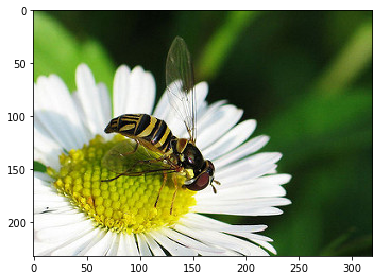

In [70]:
imshow(im)  # imshow from skimage to display picture.

#### convert from RGB to grey style

In [71]:
im_g = color.rgb2gray(im)

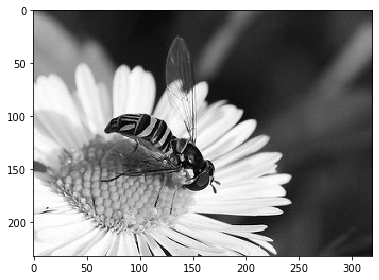

In [72]:
imshow(im_g)

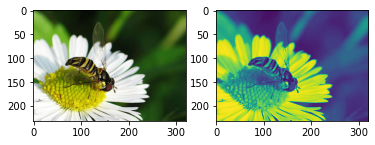

In [76]:
plt.subplot(121), plt.imshow(im)
plt.subplot(122), plt.imshow(im_g)
plt.show()

## HSV (Hue, Saturation, Value)

alternate representation of RGB colour

In [77]:
im_hsv = color.rgb2hsv(im)

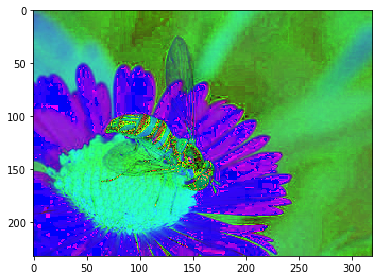

In [78]:
imshow(im_hsv)

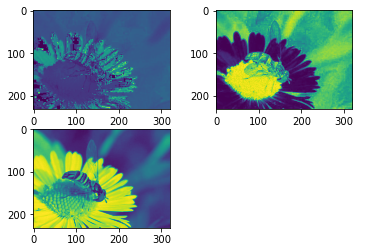

In [82]:
plt.subplot(221), plt.imshow(im_hsv[...,0])
plt.subplot(222), plt.imshow(im_hsv[...,1])
plt.subplot(223), plt.imshow(im_hsv[...,2])
plt.subplot(224), plt.axis('off')
plt.show()

## Image Resizing

In [83]:
import matplotlib.pylab as pylab

In [84]:
im = Image.open(r'E:\image_processing\test_img\5547758_eea9edfd54_n.jpg') # reading image with PIL module

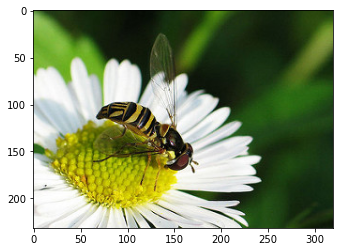

In [85]:
plt.imshow(im)

#### increase the size using interpolation

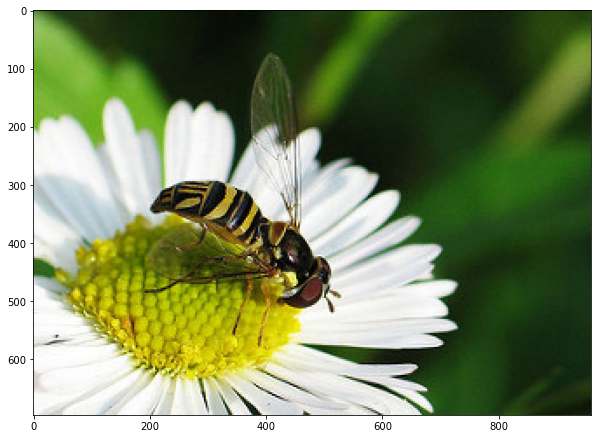

(<Figure size 720x720 with 1 Axes>,
 None)

In [86]:
imu = im.resize((im.width*3, im.height*3), Image.NEAREST)  # Nearest Neighbour Algorithm
pylab.figure(figsize=(10,10)), pylab.imshow(imu), pylab.show()

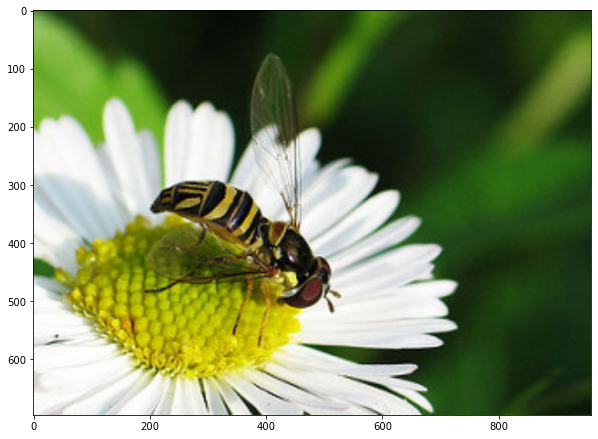

(<Figure size 720x720 with 1 Axes>,
 None)

In [87]:
imu = im.resize((im.width*3, im.height*3), Image.BILINEAR)
pylab.figure(figsize=(10,10)), pylab.imshow(imu), pylab.show()

#### reducing size (reduce height and width by factor)

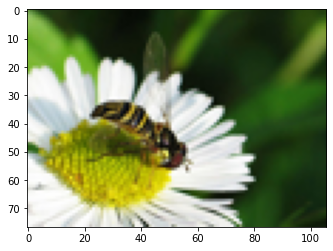

In [89]:
im_reduced = im.resize((im.width//3, im.height//3))
plt.imshow(im_reduced)